# AB2017 - Python ile Pratik Makine Öğrenimi

Bu dökümanda regresyon tipi makine öğrenimi örnekleri yapacağız. Öncelikle gerekli bazı modülleri import ediyoruz:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

Bu örnekte Boston şehrindeki ev fiyatlarını tutan bir veri seti kullanacağız. Örneğin kolayca yapılması ve görselleştirilmesi için **sadece bir tane öznitelik (feature) kullanacağız**. Amacımız, Boston ev fiyatları veri setine göre eğitilmiş bir sistem tasarlamak ve bu sistemle bir bölgedeki konut başına düşen oda sayısına göre evlere ortalama fiyat biçmek olacak. Veri setini %30'u teste ait olacak şekilde ayırdık.

In [2]:
from sklearn.model_selection import train_test_split

boston_data = datasets.load_boston()

X = boston_data.data[:, 5].reshape(-1, 1) # 6. öznitelik bölgedeki konut başına düşen ortalama oda sayısını veriyor
y = boston_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Model olarak **LinearRegression**'ı seçtik. **fit_intercept** parametresini **True** yaparak, elde edilen doğrunun y eksenini kestiği noktayı da aldık. Ardından da modeli eğittik.

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Modeli eğittikten sonra doğru eğim ve kesişim noktası parametrelerine ulaşabiliriz. Regresyon tipi problemlerde genellikle başarı, ortalama hatanın ne kadar az olduğuna bağlıdır.

In [4]:
print "Doğru katsayıları:"
print model.coef_[0]
print model.intercept_

print
print "Ortalama Hata (MSE):"
print np.mean((model.predict(X_test) - y_test) ** 2)

Doğru katsayıları:
9.60442300841
-37.7576058805

Ortalama Hata (MSE):
41.299065468


Ardından eğitim veri setini ve modelden geçen test veri setini grafiğe çizdirebiliriz.

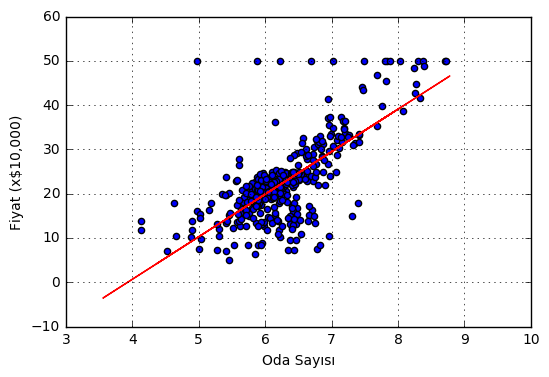

In [5]:
plt.scatter(X_train, y_train)
plt.plot(X_test, model.predict(X_test), color='red')
plt.xlabel(u"Oda Sayısı")
plt.ylabel(u"Fiyat (x$10,000)")
plt.grid(True)

Bu noktadan sonra model üstünde **predict** metodunu çağırarak eğittiğimiz sistemi kullanabiliriz:

In [6]:
inputs = np.array([7.5]).reshape(1, -1) # Bölgedeki konut başına düşen ortalama oda sayısı 7.5 olsun
prediction = model.predict(inputs)[0]

print(u"Tahmin edilen fiyat (x$10,000): %.2f" % prediction)

Tahmin edilen fiyat (x$10,000): 34.28
